In [1]:
import numpy as np  
import matplotlib.mlab as mlab  
import matplotlib.pyplot as plt 

## data为近95期的快乐8中奖数据。
快乐8开奖查询：https://www.zhcw.com/kjxx/kl8/
快乐8游戏规则：https://www.zhcw.com/c/2020-09-22/618869.shtml
若福彩中心真的为随机抽奖，则每期从1-80抽的20个数字被抽中的概率应一样均为20/80=0.25，则这95期共95*20=1900条数据，各个数字的数据应在95*0.25=23.75左右，

In [3]:
data_line = len(open(r"data1.txt","r",encoding='utf-8').readlines())#获取数据行数
data_np=np.zeros((data_line,20))

In [4]:
data_line

4

In [5]:
data_line = len(open(r"data.txt","r",encoding='utf-8').readlines())#获取数据行数
data_np=np.zeros((data_line,20))
i=0
k=0
with open("data.txt", "r",encoding='utf-8') as f:
    for line in f.readlines():
        k=0
        for j in range(22,62,2):
            data_np[i][k]=10*int(line[j])+int(line[j+1])
            k=k+1
        i=i+1
print(data_np)

[[10. 12. 13. ... 70. 77. 80.]
 [ 2.  7.  9. ... 69. 77. 79.]
 [ 6. 13. 17. ... 68. 73. 80.]
 ...
 [ 4.  8. 14. ... 75. 77. 80.]
 [ 2.  5. 10. ... 67. 78. 79.]
 [ 6.  8. 15. ... 77. 78. 80.]]


In [6]:
#统计这些数真的是随机分布吗
m=np.zeros(81)
for i in range(data_line):
    for j in range(20):
        m[int(data_np[i][j])]+=1

In [7]:
print(m)

[ 0. 14. 29. 23. 27. 22. 22. 27. 24. 23. 31. 29. 28. 35. 23. 26. 32. 21.
 23. 34. 17. 18. 19. 26. 22. 22. 19. 24. 25. 19. 35. 11. 28. 24. 28. 26.
 19. 27. 21. 24. 27. 27. 25. 24. 21. 20. 21. 18. 32. 26. 23. 33. 21. 25.
 26. 17. 21. 25. 20. 22. 24. 29. 24. 26. 18. 22. 18. 18. 21. 17. 33. 20.
 26. 20. 16. 27. 26. 25. 19. 20. 30.]


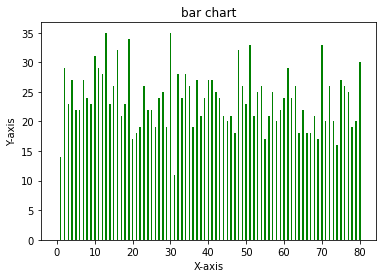

In [8]:
X=range(81)
Y=m 
fig = plt.figure()
plt.bar(X,Y,0.4,color="green")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("bar chart")
plt.show() 

In [9]:
m_sum=0
for i in range(81):
    m_sum+=m[i]
print(m_sum/80)

23.75


## 结论：上述数据证明了从均值和图像两个维度来看快乐8玩法是符合随机特征的。
接下来我们要根据以往数据来预测下一次最可能出的数字。主要思路如下：越新抽中的数字，再次出现的可能性越低。那么我们采用对不同期数赋予不同的权值，对这80个数字进行分配不同的权重，越新出现的数字我们赋予较低的权重，最后这80个数字，权重最高的数字说明我们预测出现的可能性越高。
那么权重我们到底如何分配呢？我们先用最朴素的想法：比如共95期，那么最老的那一期抽中的数字我们赋值为95，最新刚抽中一期的数字我们赋权重值为1。代码如下

In [12]:
weight=np.zeros(81)
for i in range(data_line):
    for j in range(20):
        weight[int(data_np[i][j])]+=i+1

In [13]:
print(weight)

[   0.  607. 1381. 1173. 1278. 1063.  995. 1193. 1313. 1044. 1558. 1493.
 1212. 1593.  911. 1190. 1511.  805. 1158. 1652.  744.  887.  926. 1205.
  999.  839.  958. 1025. 1047.  872. 1775.  532. 1591.  974. 1169. 1227.
  972. 1211. 1121. 1266. 1307. 1165. 1286. 1180. 1043.  823. 1034.  915.
 1574. 1369. 1117. 1648.  909. 1279. 1227.  886. 1024. 1390. 1143.  911.
  892. 1482.  947. 1229. 1076.  978.  914.  754.  934.  706. 1569. 1051.
 1366.  924.  765. 1491. 1293. 1213. 1147. 1123. 1646.]


In [15]:
#按照权重从小到大排序
weight_sort=np.argsort(weight)
print(weight_sort)

[ 0 31  1 69 20 67 74 17 45 25 29 55 21 60 52 59 14 66 47 73 22 68 62 26
 36 33 65  6 24 56 27 46 44  9 28 71  5 64 50 38 79 58 78 18 41 34  3 43
 15  7 23 37 12 77 54 35 63 39  4 53 42 76 40  8 72 49  2 57 61 75 11 16
 10 70 48 32 13 80 51 19 30]


In [17]:
#输出权重最大的前五个
print(weight_sort[-5:])

[13 80 51 19 30]


# 下面应该试着从中彩网爬取快乐8数据

In [18]:
import requests

In [ ]:
# 本部分先略过